In [85]:
from fastai.tabular import *

import pandas as pd
import numpy as np

import glob

In [86]:
df = pd.concat([pd.read_csv(f, encoding='latin1') for f in glob.glob('../data/v4/*.csv')])

In [87]:
oversampling = df[df.duration > 1300]

In [88]:
df = pd.concat([oversampling, oversampling, df])

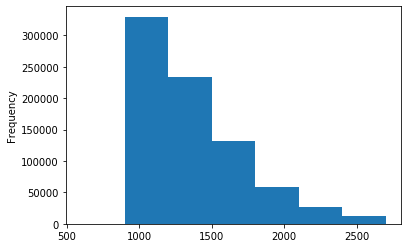

In [89]:
df.duration.plot.hist(bins=np.arange(600, 3000, 300))

In [90]:
df.duration = df.duration.astype('float32')

In [91]:
cont_names = [
    'origin_day_sin', 'origin_day_cos', 'origin_hour_sin', 'origin_hour_cos',
    'origin_distance_from_density_center', 'origin_bearing_from_density_center',
    'origin_distance_from_speed_center', 'origin_bearing_from_speed_center',
    'dest_distance_from_density_center', 'dest_bearing_from_density_center',
    'dest_distance_from_speed_center', 'dest_bearing_from_speed_center',
    'distance_origin_dest', 'bearing_origin_dest',
    'distance_origin_dest_density_cluster', 'distance_origin_dest_speed_cluster',
    'origin_distance_from_density_center_squared', 'origin_distance_from_speed_center_squared',
    'dest_distance_from_density_center_squared', 'dest_distance_from_speed_center_squared',
    'distance_origin_dest_squared', 
    'distance_origin_dest_density_cluster_squared', 'distance_origin_dest_speed_cluster_squared',
]
cat_names = [
    "origin_day", "origin_hour",
    "origin_density_cluster", "origin_speed_cluster",
    "dest_density_cluster", "dest_speed_cluster",
    "day_hour_crossing", "origin_dest_density_cluster_crossing", "origin_dest_speed_cluster_crossing"
]
dep_var = 'duration'

In [92]:
procs = [Categorify, Normalize]

In [93]:
np.random.seed(2020)
valids = np.random.random(df.shape[0])

In [94]:
valid_idx = df[valids > 0.9].index

In [95]:
data = TabularDataBunch.from_df(
    '../models', df, dep_var, valid_idx=valid_idx, procs=procs, 
    cat_names=cat_names, cont_names=cont_names
)

In [96]:
learn = tabular_learner(
    data, layers=[512, 256, 64], ps=[0.4, 0.4, 0.4], metrics=root_mean_squared_error
)

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


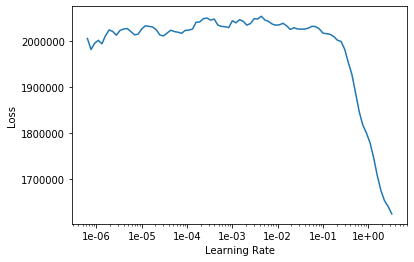

In [28]:
learn.recorder.plot()

In [29]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(8, 5)
    (1): Embedding(25, 10)
    (2): Embedding(21, 9)
    (3): Embedding(21, 9)
    (4): Embedding(21, 9)
    (5): Embedding(21, 9)
    (6): Embedding(169, 28)
    (7): Embedding(401, 46)
    (8): Embedding(397, 46)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(23, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=194, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=256, out_features=64, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(64, eps=

In [30]:
learn.fit_one_cycle(1, 0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,100315.304688,108593.945312,327.416962,07:58


In [31]:
learn.fit_one_cycle(1, 0.5)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,103109.375000,114153.375000,335.769806,10:56


In [32]:
learn.fit_one_cycle(1, 0.02)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,88644.742188,94419.148438,305.515198,10:05


In [33]:
learn.export('dev-fastai-999-balance-2.pkl')

In [73]:
# for production - train 100 % of the data

In [74]:
data = TabularDataBunch.from_df(
    '../models', df, dep_var, valid_idx=df.index, procs=procs, 
    cat_names=cat_names, cont_names=cont_names
)

In [75]:
learn = tabular_learner(
    data, layers=[512, 256, 64], ps=[0.4, 0.4, 0.4], metrics=root_mean_squared_error
)

In [76]:
learn.fit_one_cycle(8, 0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,112681.546875,123125.320312,349.148285,11:13
1,127687.687500,172170.734375,412.396027,11:38
2,132868.750000,164058.906250,402.857330,15:30
3,128841.250000,239479.890625,429.407410,15:47
4,122828.820312,462052.937500,498.929657,08:33
5,110938.382812,129507.250000,357.694336,13:33
6,98056.593750,97273.984375,310.125122,15:29
7,83514.609375,74375.179688,270.743073,13:49


In [77]:
learn.fit_one_cycle(2, 0.4)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,142287.484375,232221.968750,479.364899,11:36
1,98839.937500,106703.468750,325.032715,14:04


In [78]:
learn.fit_one_cycle(8, 0.02)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,89951.335938,90609.156250,299.192566,10:24
1,101332.296875,118530.656250,342.550415,12:32
2,98328.843750,113854.593750,335.862793,09:20
3,97745.484375,99113.132812,313.130066,10:57
4,91385.109375,93176.726562,301.598877,11:14
5,85311.625000,74765.218750,271.753052,10:18
6,78887.695312,64408.324219,251.804062,10:46
7,73431.539062,67523.640625,258.125519,09:33


In [79]:
learn.fit_one_cycle(8, 0.005)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,74705.070312,63663.875000,250.275345,09:19
1,84713.203125,76531.039062,274.777069,15:16
2,82721.968750,79080.625000,279.478271,14:23
3,83041.000000,72699.546875,267.821655,12:58
4,76768.625000,66224.140625,255.218506,09:30
5,72049.453125,62776.820312,247.471344,09:05
6,68743.687500,57648.402344,238.177505,11:09
7,67609.656250,52443.843750,226.950409,11:25


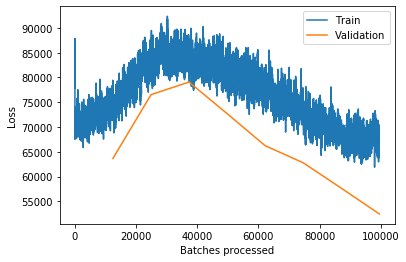

In [80]:
learn.recorder.plot_losses()

In [81]:
learn.export('fastai-999-balance-2.pkl')

In [ ]:
# overfitting like crazy
# http://karpathy.github.io/2019/04/25/recipe/

In [98]:
data = TabularDataBunch.from_df(
    '../models', df, dep_var, valid_idx=df.index, procs=procs, 
    cat_names=cat_names, cont_names=cont_names
)

In [99]:
learn = tabular_learner(
    data, layers=[512, 256, 64], ps=[0.4, 0.4, 0.4], metrics=root_mean_squared_error
)

In [100]:
learn.fit_one_cycle(8, 0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,119068.992188,168064.531250,399.960754,12:46
1,133484.812500,181060.046875,423.142975,09:30
2,134690.562500,144010.187500,376.736115,09:40
3,124178.679688,195997.406250,440.477356,09:42
4,120648.234375,1983068.000000,753.878479,09:42
5,116636.656250,137504.750000,364.758636,09:31
6,99684.109375,99116.101562,312.825714,09:28
7,84153.921875,78135.101562,277.697723,09:43


In [101]:
learn.fit_one_cycle(8, 0.1)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,108578.375000,133039.781250,345.742126,09:37
1,117515.390625,135489.140625,365.517273,09:22
2,122144.734375,149399.437500,383.995728,09:29
3,117487.796875,1373634.125000,530.333313,09:32
4,108027.953125,117792.796875,341.242004,09:32
5,104476.218750,109463.226562,329.182922,09:48
6,92078.015625,87965.773438,294.932129,09:30
7,79522.968750,84061.296875,282.218781,10:25


In [102]:
learn.fit_one_cycle(8, 0.01)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,77615.562500,76394.046875,273.108948,10:17
1,95119.671875,80422.257812,281.550354,09:51
2,91268.320312,99341.929688,313.434479,09:31
3,92187.335938,76033.484375,274.047241,09:35
4,87923.015625,74002.140625,270.499329,09:44
5,79409.562500,65030.652344,253.120224,09:44
6,74822.945312,60527.773438,244.032959,09:49
7,71436.539062,54709.906250,231.991302,09:50


In [103]:
learn.fit_one_cycle(8, 0.001)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,67303.156250,58996.714844,241.133133,09:43
1,72652.585938,55485.371094,233.858566,09:39
2,71497.429688,54995.714844,232.809631,09:57
3,66131.906250,53327.535156,229.167236,09:51
4,68198.312500,50465.667969,222.854462,09:54
5,62512.710938,50929.175781,223.953033,09:56
6,70663.750000,58326.433594,239.996841,09:56
7,64053.371094,55364.132812,233.680069,10:00


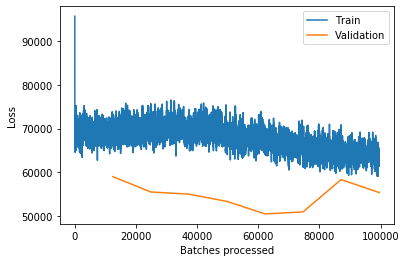

In [104]:
learn.recorder.plot_losses()

In [105]:
learn.export('fastai-999-balance-2-overfitting.pkl')